k-means first, EDA Check

In [12]:
import pandas as pd

df = pd.read_csv("wine-clustering.csv")
print (df.info())
print("------------------------------------------")
print (df.describe())
print("------------------------------------------")
print (df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
------------------------------------------
          Alcohol  Malic_Acid 

normalisasi

In [13]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine-clustering.csv")
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
print(df_normalized.head())

    Alcohol  Malic_Acid       Ash  ...       Hue     OD280   Proline
0  1.518613   -0.562250  0.232053  ...  0.362177  1.847920  1.013009
1  0.246290   -0.499413 -0.827996  ...  0.406051  1.113449  0.965242
2  0.196879    0.021231  1.109334  ...  0.318304  0.788587  1.395148
3  1.691550   -0.346811  0.487926  ... -0.427544  1.184071  2.334574
4  0.295700    0.227694  1.840403  ...  0.362177  0.449601 -0.037874

[5 rows x 13 columns]


find cluster

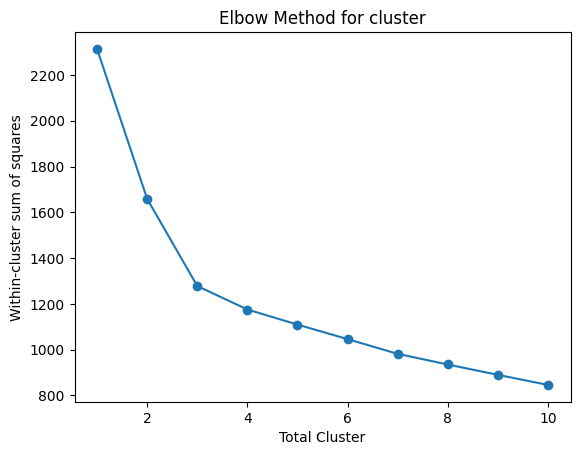

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter= 300, n_init=10, random_state=42)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

plt.Figure(figsize=(20,16))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method for cluster")
plt.xlabel("Total Cluster")
plt.ylabel("Within-cluster sum of squares")
plt.show()

i take the cluster is 3
then do the clustering with k-means

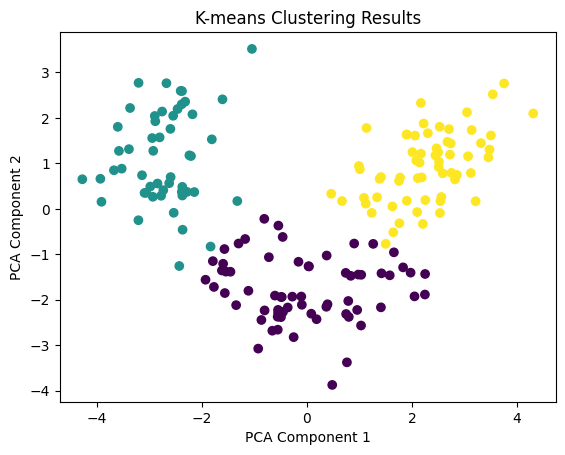

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=33)
kmeans.fit(df_normalized)
df['Cluster'] = kmeans.labels_
 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized)

plt.scatter(pca_result[:, 0], pca_result[:,1], c = df['Cluster'], cmap='viridis')
plt.title("K-means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

df.to_csv("ClusteredWine.csv", index=False)




evaluasi

------------Visualizasi with groupby-----------------
           Alcohol  Malic_Acid       Ash  ...       Hue     OD280      Proline
Cluster                                   ...                                 
0        12.250923    1.897385  2.231231  ...  1.062708  2.803385   510.169231
1        13.134118    3.307255  2.417647  ...  0.691961  1.696667   619.058824
2        13.676774    1.997903  2.466290  ...  1.065484  3.163387  1100.225806

[3 rows x 13 columns]
----------viasualasisasi with seaborn---------------


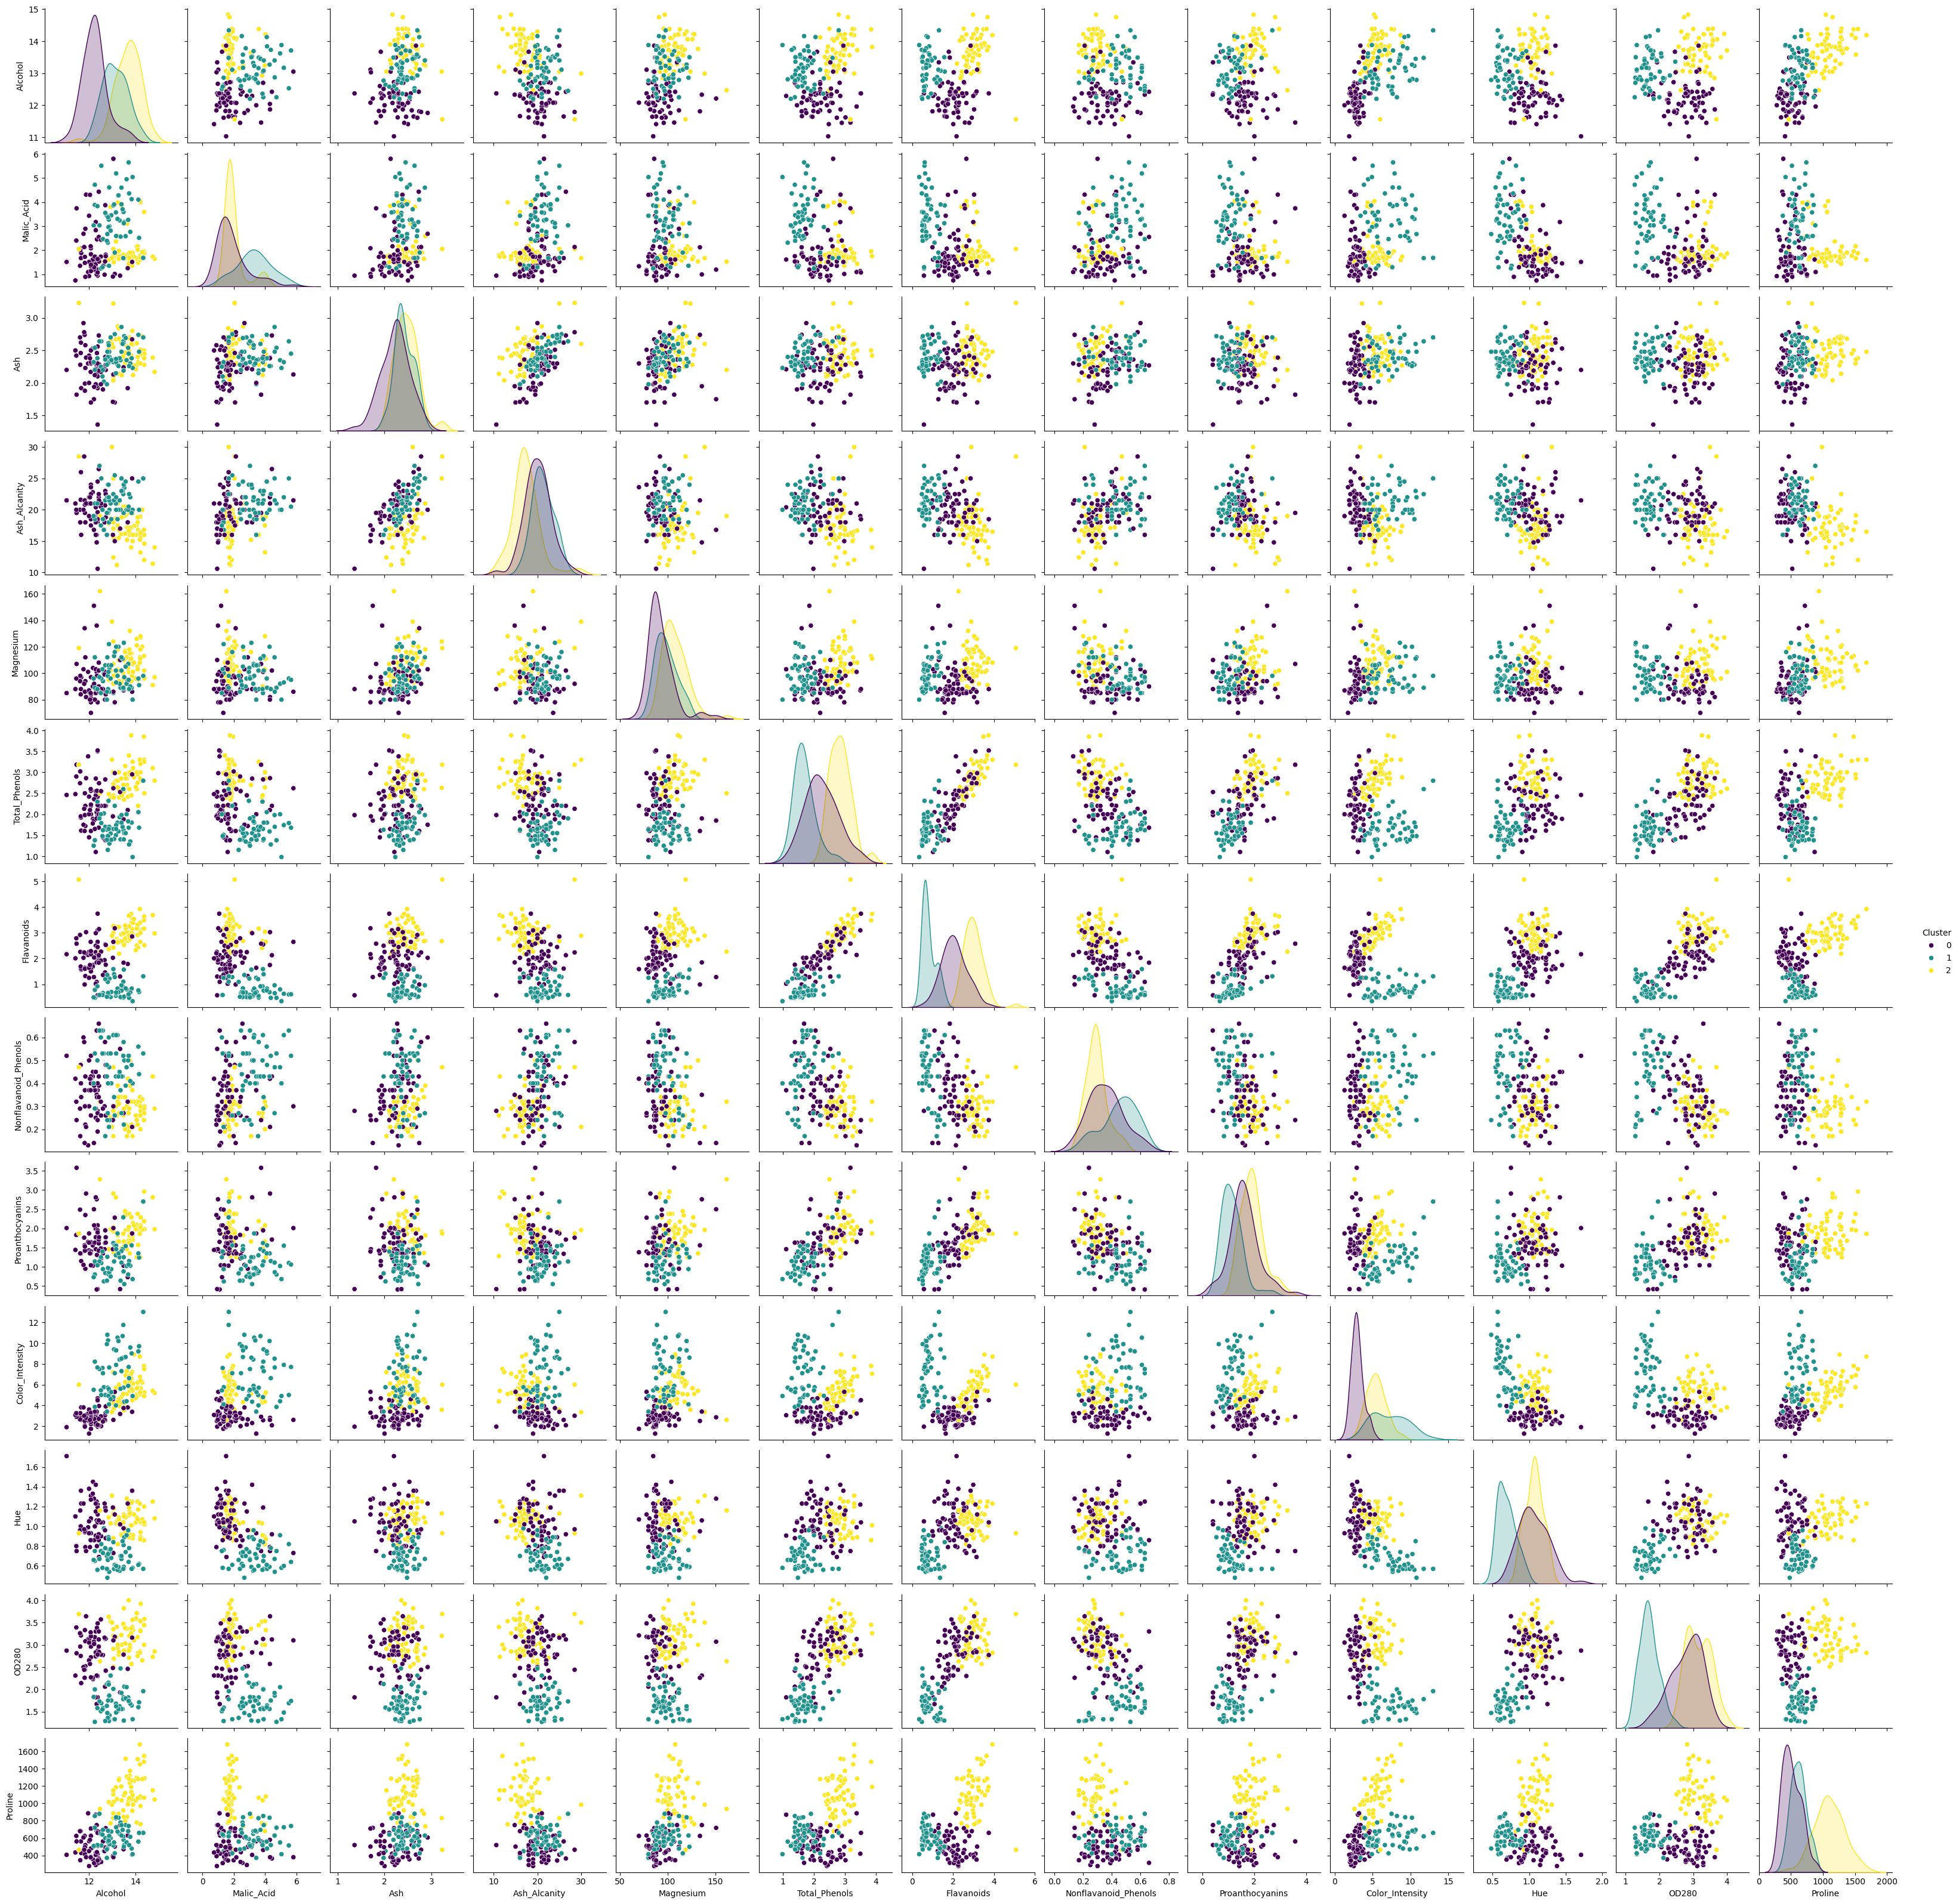

--------Siloutte score--------------------------------
Silhoutte Skor : 0.2848589191898987 
------------------Davies Boulden Index - -------------
Davies Bouldin Index : 1.3891879777181648
--------------Calinski Harazbaz ----------------------
Calinski : 70.94000800315118


In [ ]:
print("------------Visualizasi with groupby-----------------")
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

print("----------viasualasisasi with seaborn---------------")
import seaborn as sns
import matplotlib.pyplot  as plt

dfnew = pd.read_csv('ClusteredWine.csv')

df['Cluster'] = kmeans.labels_
sns.pairplot(dfnew, hue='Cluster', palette='viridis')
plt.savefig('pairplot_wine.jpg', format='jpg', dpi=300)
plt.show()

print("--------Siloutte score--------------------------------")
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_normalized, kmeans.labels_)
print(f"Silhoutte Skor : {sil_score} ") 

print("------------------Davies Boulden Index - -------------")
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(df_normalized, kmeans.labels_)
print(f"Davies Bouldin Index : {db_index}")

print("--------------Calinski Harazbaz ----------------------")
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(df_normalized, kmeans.labels_)
print(f"Calinski : {ch_score}")



analysis alcohol

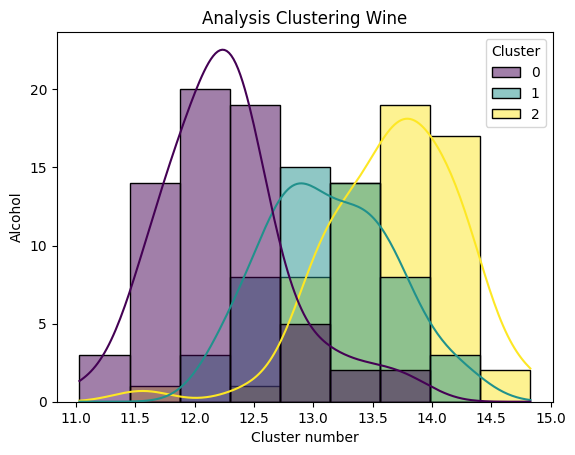

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ClusteredWine.csv')
sns.histplot(data=df, x="Alcohol", hue="Cluster", kde=True, palette="viridis")
#plt.hist(df["Cluster"], bins=5 , color='skyblue', edgecolor= 'black')
plt.title("Analysis Clustering Wine")
plt.xlabel('Cluster number')
plt.ylabel('Alcohol')
# plt.yticks(range(0,10,1))
# plt.xticks(range(0,3,1))
plt.show()

analysis boxplot

C:\Users\User\AppData\Local\Temp\ipykernel_16064\3573345208.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Alcohol', data=df, palette='viridis')


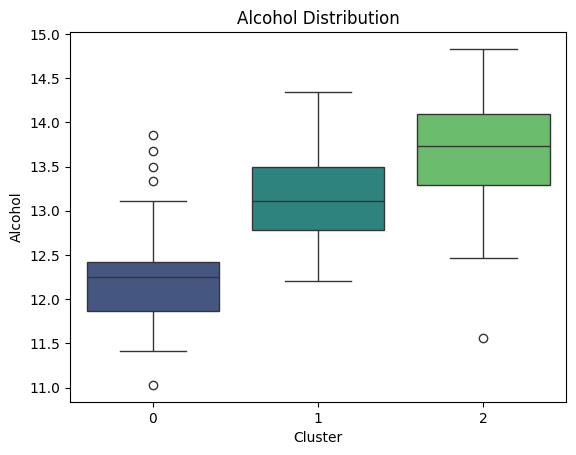

In [35]:
sns.boxplot(x='Cluster', y='Alcohol', data=df, palette='viridis')
plt.title("Alcohol Distribution")
plt.xlabel('Cluster')
plt.ylabel("Alcohol")
plt.show()

Conclussion
cluster 0 has more data/more frequency about alchohol, but it has lowest alcohol with average 12.25

cluster 2 has the second of the hightest alchol data / frequency, and the alcohol content is the highest with average 13.67

last the normal one is cluster 1, has the average of frequency and average of alcohol content

